In [105]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import  layers
import keras
from sklearn import datasets
import matplotlib.pyplot as plt

In [106]:
#load data
path = 'D:\ML_data_sql\\2022数模美赛选拔赛\\all'
data5 = pd.read_excel(os.path.join(path,'all5.xlsx'),engine='openpyxl')
df2= data5.drop(data5.columns[[9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,-2,-1]], axis=1)
df2 = df2.fillna(method='pad',axis=1)
# print(np.any(df2.isnull())) 
df2_index = pd.period_range('1991-01',periods=df2.shape[0],freq='M')
df2 = df2.drop(df2.columns[[0,4,5]],axis=1)
df2.index = df2_index
# #数据处理结束
df2.head()

,海拔高度(m),经度,纬度,平均气温(℃),平均最高气温(℃),平均最低气温(℃),平均气温≤0℃的天数,平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
1991-01,256.0,-34.616667,-77.866667,-3.28,0.12,-6.19,29.0,6.99,13.03,28.0
1991-02,256.0,-34.616667,-77.866667,-6.42,-2.68,-9.45,26.0,8.88,15.08,49.9
1991-03,256.0,-34.616667,-77.866667,-13.22,-9.73,-16.29,26.0,6.56,16.14,44.9
1991-04,256.0,-34.616667,-77.866667,-17.08,-13.37,-21.16,29.0,8.36,15.33,42.0
1991-05,256.0,-34.616667,-77.866667,-19.63,-15.64,-23.37,30.0,10.02,19.38,61.0


In [107]:
#归一化处理
from sklearn.preprocessing import MinMaxScaler

vis = df2['平均气温(℃)'].values

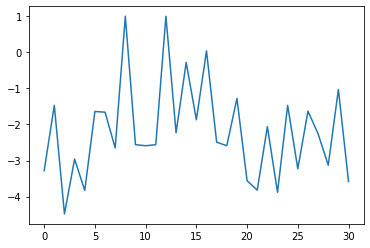

[-3.28,
 -1.47,
 -4.48,
 -2.96,
 -3.83,
 -1.64,
 -1.66,
 -2.65,
 1.0,
 -2.56,
 -2.59,
 -2.56,
 1.0,
 -2.23,
 -0.28,
 -1.87,
 0.04,
 -2.49,
 -2.59,
 -1.28,
 -3.56,
 -3.82,
 -2.06,
 -3.88,
 -1.47,
 -3.23,
 -1.63,
 -2.26,
 -3.13,
 -1.03,
 -3.58]

In [108]:
one =[]
for i in range(0,len(vis),12):
    one.append(vis[i])

plt.plot(one)
plt.show()
one

In [109]:
vis = vis.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(vis)
# print(scaled_data)
scaled_data_series = scaled_data.reshape(-1,1)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix][-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [110]:
scaled_data_series.shape

(371, 1)

In [111]:
raw_seq = scaled_data_series

# choose a number of time steps
#设置步长
n_steps = 12

# split into samples
X, y = split_sequence(raw_seq, n_steps)


In [112]:
print(X.shape,y.shape)

(359, 12, 1) (359,)


In [113]:

train_data = X[:-24]
test_data = X[-24:]

train_y = y[:-24]
test_y = y[-24:]

y1 = np.arange(1,train_data.shape[0]+1) 
y2 = np.arange(train_data.shape[0],train_data.shape[0]+test_data.shape[0])

# plt.plot(y1, train_data, 'r', y2, test_data, 'b')
# plt.show()

In [114]:
train_data.shape

(335, 12, 1)

Epoch 1/100
168/168 - 1s - loss: 0.0597
Epoch 2/100
168/168 - 1s - loss: 0.0386
Epoch 3/100
168/168 - 0s - loss: 0.0302
Epoch 4/100
168/168 - 0s - loss: 0.0213
Epoch 5/100
168/168 - 0s - loss: 0.0236
Epoch 6/100
168/168 - 0s - loss: 0.0162
Epoch 7/100
168/168 - 0s - loss: 0.0154
Epoch 8/100
168/168 - 1s - loss: 0.0145
Epoch 9/100
168/168 - 1s - loss: 0.0139
Epoch 10/100
168/168 - 0s - loss: 0.0122
Epoch 11/100
168/168 - 1s - loss: 0.0137
Epoch 12/100
168/168 - 1s - loss: 0.0122
Epoch 13/100
168/168 - 0s - loss: 0.0112
Epoch 14/100
168/168 - 1s - loss: 0.0109
Epoch 15/100
168/168 - 1s - loss: 0.0110
Epoch 16/100
168/168 - 0s - loss: 0.0110
Epoch 17/100
168/168 - 0s - loss: 0.0106
Epoch 18/100
168/168 - 0s - loss: 0.0105
Epoch 19/100
168/168 - 0s - loss: 0.0103
Epoch 20/100
168/168 - 1s - loss: 0.0107
Epoch 21/100
168/168 - 1s - loss: 0.0097
Epoch 22/100
168/168 - 0s - loss: 0.0098
Epoch 23/100
168/168 - 0s - loss: 0.0105
Epoch 24/100
168/168 - 1s - loss: 0.0100
Epoch 25/100
168/168 - 1s

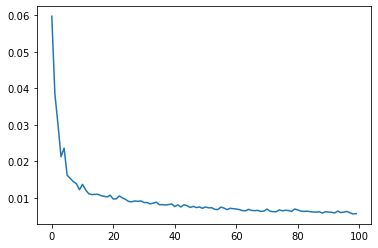

In [115]:
n_features = 1
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], n_features)
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], n_features)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)
plt.plot(history.history['loss'])
plt.savefig('loss')
plt.show()

In [116]:
predictions = model.predict(test_data, verbose=2)
train_pre = model.predict(train_data,verbose=2)
predictions = predictions.reshape(predictions.shape[0])
print(predictions.shape, test_y.shape)

1/1 - 0s
11/11 - 0s
(24,) (24,)


In [69]:
show_data = np.hstack((train_y,test_y))
print(len(show_data))
print(train_pre.shape,predictions.shape)
train_pre = train_pre.squeeze()
pre_data = np.hstack((train_pre,predictions))

359
(335, 1) (24,)


In [51]:
train_pre[120:150]

array([0.62744343, 0.51430506, 0.3747241 , 0.6934701 , 0.77425915,
       0.8118    , 0.8443652 , 0.8703584 , 0.88721365, 0.8887572 ,
       0.8689034 , 0.86609375, 0.8364053 , 0.56907177, 0.4115228 ,
       0.27931267, 0.21561536, 0.19014162, 0.15527886, 0.14253262,
       0.18233645, 0.28784746, 0.45870578, 0.60725003, 0.66877776,
       0.5616825 , 0.42351872, 0.30258533, 0.176194  , 0.14939529],
      dtype=float32)

In [70]:
pre_18 = train_pre[144:]
pre_18.shape,predictions.shape

((191,), (24,))

In [72]:
predict = np.hstack((pre_18, predictions))
# predict.shape
predict = predict.reshape(-1,1)
pre_train,_ =split_sequence(predict,12)
pre_2022 = model.predict(pre_train,verbose=2)

(215,)

In [82]:
pre_2022 = pre_2022.reshape(-1,1)
pre_train,_ =split_sequence(pre_2022,12)
pre_2023 = model.predict(pre_train,verbose=2)

6/6 - 0s


In [87]:
pre_2023 = pre_2023.reshape(-1,1)
pre_train,_ =split_sequence(pre_2023,12)
pre_2024 = model.predict(pre_train,verbose=2)

6/6 - 0s


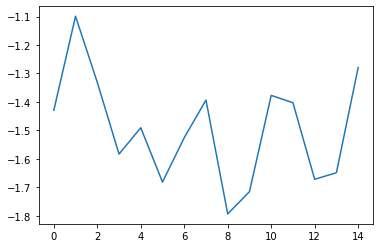

In [88]:
pre_2024_real = scaler.inverse_transform(pre_2024)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2024_real),12):
    aaa.append(pre_2024_real[i])

plt.plot(aaa)
plt.show()

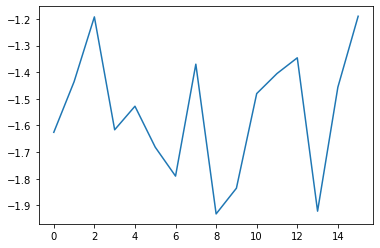

array([[ -1.6258031],
       [ -5.229222 ],
       [ -9.173869 ],
       [-13.129282 ],
       [-16.307646 ],
       [-17.500237 ],
       [-18.930655 ],
       [-19.090883 ],
       [-17.352386 ],
       [-12.81212  ],
       [ -5.899347 ],
       [ -1.8332793],
       [ -1.4358362],
       [ -3.741906 ],
       [ -9.282225 ],
       [-13.060114 ],
       [-16.03092  ],
       [-18.055843 ],
       [-19.633478 ],
       [-19.423883 ],
       [-17.327324 ],
       [-12.810343 ],
       [ -5.641087 ],
       [ -1.5180409],
       [ -1.1925333],
       [ -4.612046 ],
       [ -9.355933 ],
       [-13.406686 ],
       [-16.130579 ],
       [-18.230541 ],
       [-19.250353 ],
       [-18.990469 ],
       [-16.989594 ],
       [-12.468835 ],
       [ -5.427705 ],
       [ -1.5668143],
       [ -1.6162571],
       [ -5.0837007],
       [-10.553159 ],
       [-14.225968 ],
       [-16.922726 ],
       [-18.68982  ],
       [-19.544765 ],
       [-19.035332 ],
       [-16.191626 ],
       [-1

In [86]:
pre_2023_real = scaler.inverse_transform(pre_2023)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2023_real),12):
    aaa.append(pre_2023_real[i])

plt.plot(aaa)
plt.show()
# pre_2023_real

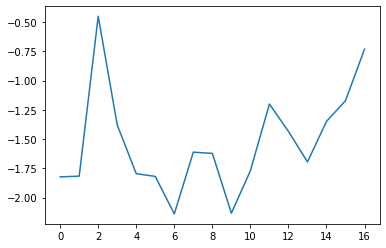

[array([-1.8235205], dtype=float32),
 array([-1.817317], dtype=float32),
 array([-0.45029575], dtype=float32),
 array([-1.3799032], dtype=float32),
 array([-1.7962279], dtype=float32),
 array([-1.8194729], dtype=float32),
 array([-2.1401896], dtype=float32),
 array([-1.6123438], dtype=float32),
 array([-1.6227248], dtype=float32),
 array([-2.1333792], dtype=float32),
 array([-1.7713487], dtype=float32),
 array([-1.2008727], dtype=float32),
 array([-1.434231], dtype=float32),
 array([-1.6957484], dtype=float32),
 array([-1.3492346], dtype=float32),
 array([-1.1718786], dtype=float32),
 array([-0.7313933], dtype=float32)]

In [85]:
pre_2022_real = scaler.inverse_transform(pre_2022)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_real),12):
    aaa.append(pre_2022_real[i])

plt.plot(aaa)
plt.show()
aaa

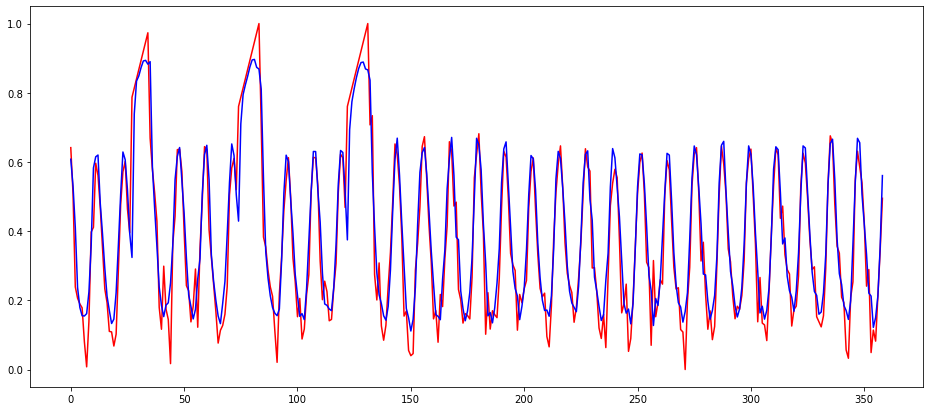

In [11]:
fig = plt.figure(figsize=(16, 7))
plt.plot(range(len(show_data)), show_data,'r',range(len(show_data)),pre_data,'b')
# plt.savefig('all1.png')
plt.show()

In [90]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_data.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
history2 = regressor.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
168/168 - 3s - loss: 0.0652
Epoch 2/100
168/168 - 3s - loss: 0.0632
Epoch 3/100
168/168 - 3s - loss: 0.0583
Epoch 4/100
168/168 - 3s - loss: 0.0603
Epoch 5/100
168/168 - 3s - loss: 0.0590
Epoch 6/100
168/168 - 3s - loss: 0.0565
Epoch 7/100
168/168 - 3s - loss: 0.0588
Epoch 8/100
168/168 - 3s - loss: 0.0523
Epoch 9/100
168/168 - 3s - loss: 0.0454
Epoch 10/100
168/168 - 3s - loss: 0.0393
Epoch 11/100
168/168 - 3s - loss: 0.0374
Epoch 12/100
168/168 - 3s - loss: 0.0303
Epoch 13/100
168/168 - 3s - loss: 0.0243
Epoch 14/100
168/168 - 3s - loss: 0.0205
Epoch 15/100
168/168 - 3s - loss: 0.0228
Epoch 16/100
168/168 - 3s - loss: 0.0199
Epoch 17/100
168/168 - 3s - loss: 0.0156
Epoch 18/100
168/168 - 3s - loss: 0.0158
Epoch 19/100
168/168 - 3s - loss: 0.0157
Epoch 20/100
168/168 - 3s - loss: 0.0140
Epoch 21/100
168/168 - 3s - loss: 0.0118
Epoch 22/100
168/168 - 3s - loss: 0.0127
Epoch 23/100
168/168 - 3s - loss: 0.0136
Epoch 24/100
168/168 - 3s - loss: 0.0125
Epoch 25/100
168/168 - 3s

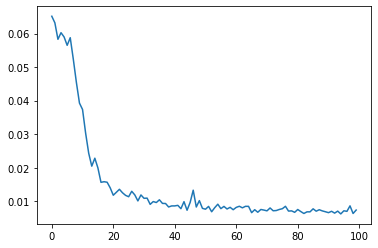

In [14]:
plt.plot(history2.history['loss'])
plt.savefig('loss_big.png')
plt.show()

In [15]:
predictions2 = regressor.predict(test_data, verbose=2)
train_pre2 = regressor.predict(train_data,verbose=2)
predictions2 = predictions2.reshape(predictions.shape[0])
train_pre2 = train_pre2.squeeze()
pre_data2 = np.hstack((train_pre2,predictions2))

1/1 - 0s
11/11 - 0s


In [91]:
predict2 = np.hstack((pre_18, predictions2))
# predict.shape
predict2 = predict2.reshape(-1,1)
pre_train2,_ =split_sequence(predict2,12)
pre_2022_2= model.predict(pre_train2,verbose=2)

7/7 - 0s


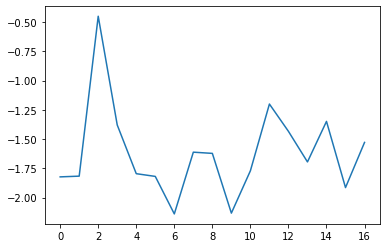

[array([-1.8235205], dtype=float32),
 array([-1.817317], dtype=float32),
 array([-0.45029575], dtype=float32),
 array([-1.3799032], dtype=float32),
 array([-1.7962279], dtype=float32),
 array([-1.8194729], dtype=float32),
 array([-2.1401896], dtype=float32),
 array([-1.6123438], dtype=float32),
 array([-1.6227248], dtype=float32),
 array([-2.1333792], dtype=float32),
 array([-1.7713487], dtype=float32),
 array([-1.2008727], dtype=float32),
 array([-1.434231], dtype=float32),
 array([-1.6957484], dtype=float32),
 array([-1.3492346], dtype=float32),
 array([-1.9150788], dtype=float32),
 array([-1.5290018], dtype=float32)]

In [93]:
pre_2022_2_r = scaler.inverse_transform(pre_2022_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_2_r),12):
    aaa.append(pre_2022_2_r[i])

plt.plot(aaa)
plt.show()
aaa

In [16]:
#return
# print(predictions2.shape)
tool = np.ones((len(predictions),4))
# test_y = test_y[:,np.newaxis]
# predictions = predictions[:,np.newaxis]
# predictions2 = predictions2[:,np.newaxis]


# # print(tool.shape,test_y.shape)
# test_y.squeeze()
# real = np.concatenate([tool,test_y],axis=1)
# pre_real1 =np.concatenate([tool,predictions],axis=1) 
# pre_real2 = np.concatenate([tool,predictions2],axis=1)
# tool2 = scaler.inverse_transform(real)
# tool3 = scaler.inverse_transform(pre_real1)
# tool4 = scaler.inverse_transform(pre_real2)
# # print(tool2[:,-1])
# print(tool3[:,-1])
# print(tool4[:,-1])